# Capstone 2 Exploratory Data Analysis File

The purpose is to import the processed data from the wrangling notebook and create histograms to look for insights related to a set of questions.

**Data to Import**
- ACT & SAT: scores.csv
- Attendance: attendance.csv
- Enrollment: enrollment.csv

**Questions to Explore**
- How different are the schools and districts in terms of scores, attendance, and enrollment?
- Are there any schools or districts that out- or under-perform the average with ACT or SAT?
- Does performance on SAT equate to performance on ACT?

## Imports

In [55]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import StrMethodFormatter
from sklearn.metrics import r2_score

## Load the data

In [3]:
scores = pd.read_csv('scores.csv')
att = pd.read_csv('attendance.csv')
enroll = pd.read_csv('enrollment.csv')

## Visualize the scores data

In [4]:
scores.head()

,LONG_SCHOOL_YEAR,SCHOOL_DISTRCT_CD,SCHOOL_DSTRCT_NM,INSTN_NUMBER,INSTN_NAME,SUBGRP_DESC_sat,TEST_CMPNT_TYP_CD_sat,NATIONAL_NUM_TESTED_CNT_sat,STATE_NUM_TESTED_CNT_sat,DSTRCT_NUM_TESTED_CNT_sat,...,SUBGRP_DESC_act,TEST_CMPNT_TYP_CD_act,NATIONAL_NUM_TESTED_CNT_act,STATE_NUM_TESTED_CNT_act,DSTRCT_NUM_TESTED_CNT_act,INSTN_NUM_TESTED_CNT_act,NATIONAL_AVG_SCORE_VAL,STATE_AVG_SCORE_VAL_act,DSTRCT_AVG_SCORE_VAL_act,INSTN_AVG_SCORE_VAL_act
0,2019-20,601,Appling County,103,Appling County High School,All Students,Combined Test Score,2198460.0,43074.0,62.0,...,All Students,Composite,1670497.0,26810.0,16,16,20.6,20.8,19.0,19.0
1,2019-20,605,Baldwin County,189,Baldwin High School,All Students,Combined Test Score,2198460.0,43074.0,83.0,...,All Students,Composite,1670497.0,26810.0,41,41,20.6,20.8,15.6,15.6
2,2019-20,606,Banks County,199,Banks County High School,All Students,Combined Test Score,2198460.0,43074.0,68.0,...,All Students,Composite,1670497.0,26810.0,28,28,20.6,20.8,20.1,20.1
3,2019-20,607,Barrow County,101,Apalachee High School,All Students,Combined Test Score,2198460.0,43074.0,362.0,...,All Students,Composite,1670497.0,26810.0,181,99,20.6,20.8,19.3,18.8
4,2019-20,607,Barrow County,3052,Winder-Barrow High School,All Students,Combined Test Score,2198460.0,43074.0,362.0,...,All Students,Composite,1670497.0,26810.0,181,82,20.6,20.8,19.3,19.9


In [5]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   LONG_SCHOOL_YEAR             352 non-null    object 
 1   SCHOOL_DISTRCT_CD            352 non-null    int64  
 2   SCHOOL_DSTRCT_NM             352 non-null    object 
 3   INSTN_NUMBER                 352 non-null    int64  
 4   INSTN_NAME                   352 non-null    object 
 5   SUBGRP_DESC_sat              352 non-null    object 
 6   TEST_CMPNT_TYP_CD_sat        352 non-null    object 
 7   NATIONAL_NUM_TESTED_CNT_sat  352 non-null    float64
 8   STATE_NUM_TESTED_CNT_sat     352 non-null    float64
 9   DSTRCT_NUM_TESTED_CNT_sat    352 non-null    float64
 10  INSTN_NUM_TESTED_CNT_sat     352 non-null    float64
 11  STATE_AVG_SCORE_VAL_sat      352 non-null    float64
 12  DSTRCT_AVG_SCORE_VAL_sat     352 non-null    int64  
 13  INSTN_AVG_SCORE_VAL_

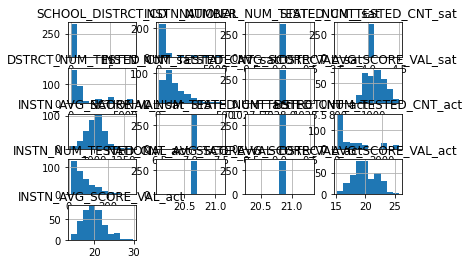

In [18]:
scores.hist()
plt.show()

### ACT at School-Level

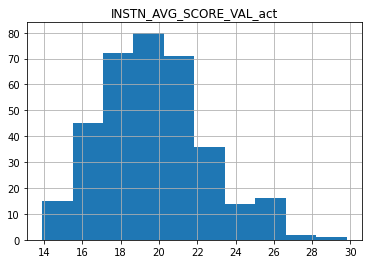

In [19]:
#Initial visualization
scores.hist(column='INSTN_AVG_SCORE_VAL_act')
plt.show()

In [29]:
# Define a function for a more customized visual (adapted from: https://mode.com/example-gallery/python_histogram/)
def simple_hist(df, column, xlabel, ylabel):
    
    ax = df.hist(column=column, bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

    ax = ax[0]
    for x in ax:

        # Despine
        x.spines['right'].set_visible(False)
        x.spines['top'].set_visible(False)
        x.spines['left'].set_visible(False)

        # Switch off ticks
        x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

        # Draw horizontal axis lines
        vals = x.get_yticks()
        for tick in vals:
            x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

        # Remove title
        x.set_title("")

        # Set x-axis label
        x.set_xlabel(xlabel, labelpad=20, weight='bold', size=12)

        # Set y-axis label
        x.set_ylabel(ylabel, labelpad=20, weight='bold', size=12)

        # Format y-axis label
        x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
    
    plt.show()
    return ax

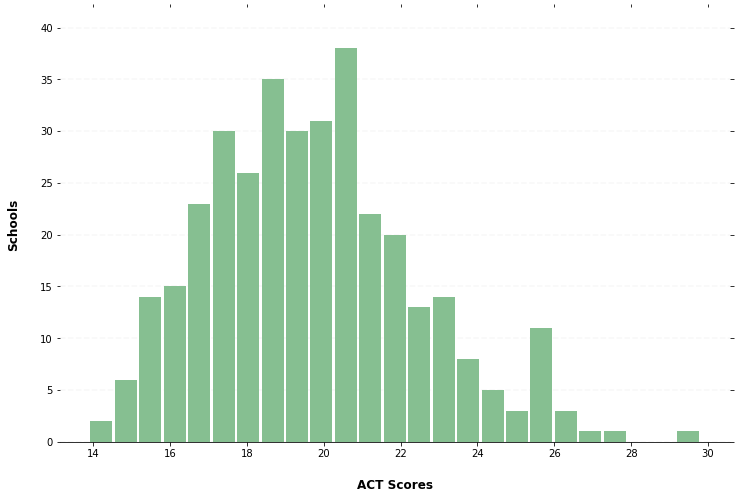

array([<AxesSubplot:xlabel='ACT Scores', ylabel='Schools'>], dtype=object)

In [30]:
simple_hist(scores, 'INSTN_AVG_SCORE_VAL_act', 'ACT Scores', 'Schools')

### SAT at School-Level

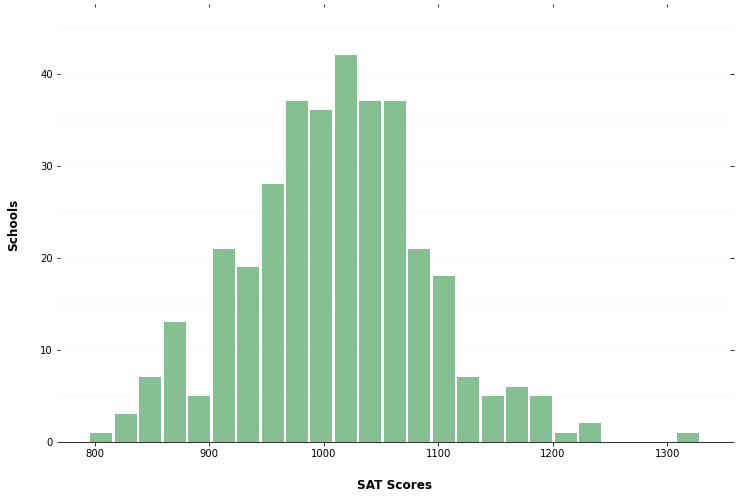

array([<AxesSubplot:xlabel='SAT Scores', ylabel='Schools'>], dtype=object)

In [31]:
simple_hist(scores, 'INSTN_AVG_SCORE_VAL_sat', 'SAT Scores', 'Schools')

### ACT at District-Level

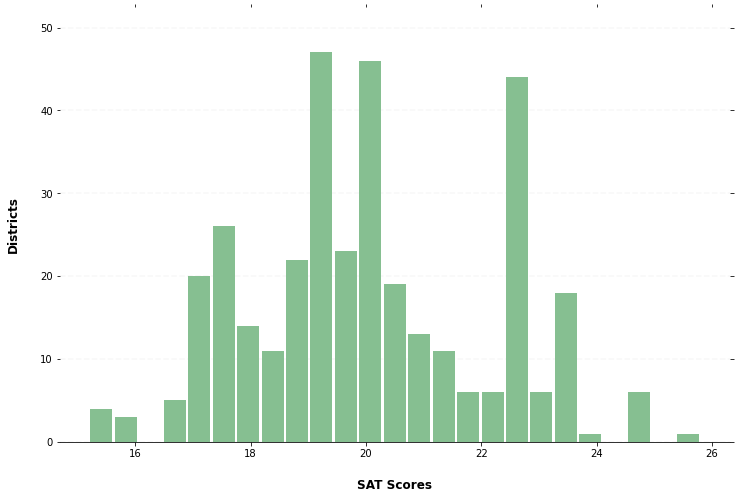

array([<AxesSubplot:xlabel='SAT Scores', ylabel='Districts'>],
      dtype=object)

In [32]:
simple_hist(scores, 'DSTRCT_AVG_SCORE_VAL_act', 'SAT Scores', 'Districts')

### SAT at District Level

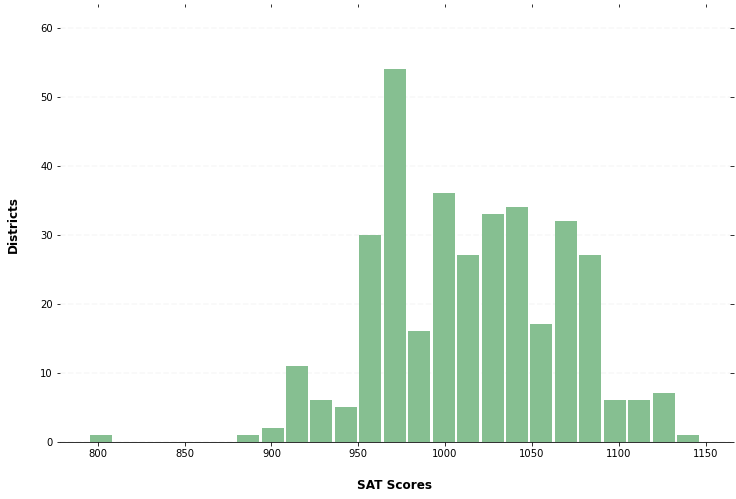

array([<AxesSubplot:xlabel='SAT Scores', ylabel='Districts'>],
      dtype=object)

In [33]:
simple_hist(scores, 'DSTRCT_AVG_SCORE_VAL_sat', 'SAT Scores', 'Districts')

### ACT vs. SAT at School-Level

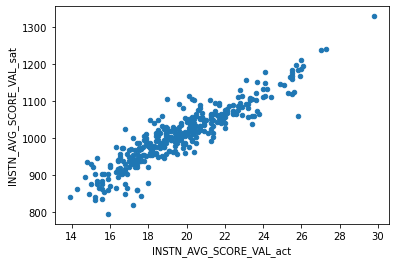

In [50]:
# Basic plot of ACT vs. SAT
scores.plot.scatter(x='INSTN_AVG_SCORE_VAL_act', y='INSTN_AVG_SCORE_VAL_sat')
plt.show()

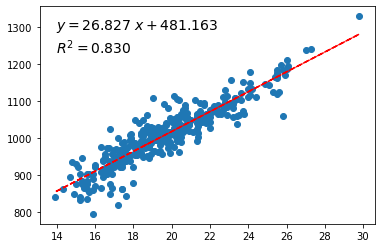

In [66]:
# Add trend line (adapted from https://stackoverflow.com/questions/41635448/how-can-i-draw-scatter-trend-line-on-matplot-python-pandas)
x = scores['INSTN_AVG_SCORE_VAL_act']
y = scores['INSTN_AVG_SCORE_VAL_sat']

plt.scatter(x,y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
y_hat = np.poly1d(z)(x)
plt.plot(x,p(x),"r--")


text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y,y_hat):0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')

plt.show()


### ACT vs. SAT at District-Level

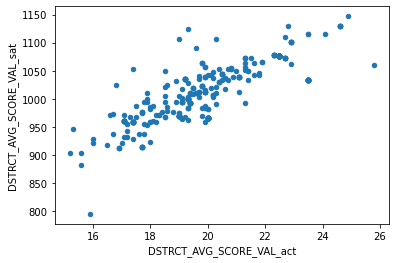

In [48]:
scores.plot.scatter(x='DSTRCT_AVG_SCORE_VAL_act', y='DSTRCT_AVG_SCORE_VAL_sat')
plt.show()

## Visualize the attendance data

In [35]:
att.head()

,LONG_SCHOOL_YEAR,DETAIL_LVL_DESC,SCHOOL_DSTRCT_CD,SCHOOL_DSTRCT_NM,INSTN_NUMBER,INSTN_NAME,GRADES_SERVED_DESC,STUDENT_COUNT_ALL,FIVE_OR_FEWER_PERCENT_ALL,SIX_TO_FIFTEEN_PERCENT_ALL,...,CHRONIC_ABSENT_PERC_MULTI,CHRONIC_ABSENT_PERC_FEMALE,CHRONIC_ABSENT_PERC_MALE,CHRONIC_ABSENT_PERC_SWD,CHRONIC_ABSENT_PERC_NOT_SWD,CHRONIC_ABSENT_PERC_ED,CHRONIC_ABSENT_PERC_NOT_ED,CHRONIC_ABSENT_PERC_LEP,CHRONIC_ABSENT_PERC_MIGRANT,Identifier
0,2019-20,School,601,Appling County,103,Appling County High School,"09,10,11,12",1027,55.6,32.9,...,23.1,10.7,13.3,15.4,11.6,12.1,0.0,13.6,8.7,601-103
1,2019-20,School,605,Baldwin County,189,Baldwin High School,"09,10,11,12",1267,55.7,29.2,...,23.7,14.0,15.0,22.7,13.4,14.5,0.0,16.7,0.0,605-189
2,2019-20,School,606,Banks County,199,Banks County High School,"09,10,11,12",904,56.0,28.0,...,23.8,16.3,15.6,23.1,14.7,20.5,10.3,20.0,0.0,606-199
3,2019-20,School,607,Barrow County,101,Apalachee High School,"09,10,11,12",2077,53.3,33.7,...,27.5,14.0,15.6,24.5,13.2,14.1,15.4,20.0,0.0,607-101
4,2019-20,School,607,Barrow County,3052,Winder-Barrow High School,"09,10,11,12",2216,53.4,33.3,...,23.6,16.8,14.7,18.6,15.3,17.6,14.3,16.7,0.0,607-3052


In [38]:
att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 83 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LONG_SCHOOL_YEAR                344 non-null    object 
 1   DETAIL_LVL_DESC                 344 non-null    object 
 2   SCHOOL_DSTRCT_CD                344 non-null    int64  
 3   SCHOOL_DSTRCT_NM                344 non-null    object 
 4   INSTN_NUMBER                    344 non-null    int64  
 5   INSTN_NAME                      344 non-null    object 
 6   GRADES_SERVED_DESC              344 non-null    object 
 7   STUDENT_COUNT_ALL               344 non-null    int64  
 8   FIVE_OR_FEWER_PERCENT_ALL       344 non-null    float64
 9   SIX_TO_FIFTEEN_PERCENT_ALL      344 non-null    float64
 10  OVER_15_PERCENT_ALL             344 non-null    float64
 11  STUDENT_COUNT_INDIAN            344 non-null    int64  
 12  FIVE_OR_FEWER_PERCENT_INDIAN    344 

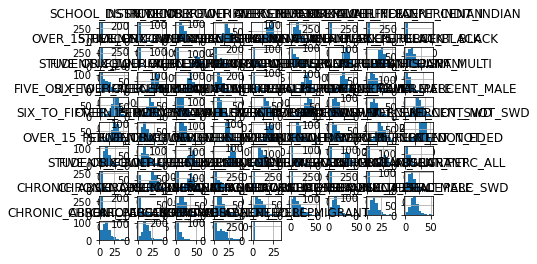

In [36]:
att.hist()
plt.show()

### Attendance at School-Level

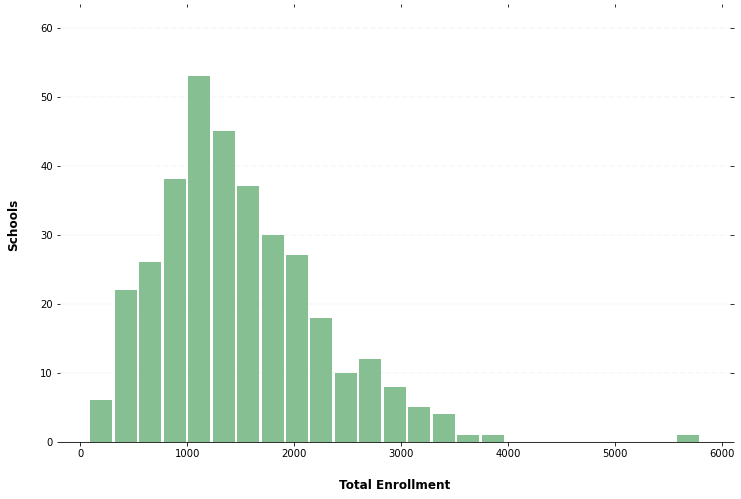

array([<AxesSubplot:xlabel='Total Enrollment', ylabel='Schools'>],
      dtype=object)

In [37]:
simple_hist(att, 'STUDENT_COUNT_ALL', 'Total Enrollment', 'Schools')

### Attendance at District-Level

In [44]:
enroll_dist = enroll.groupby('SCHOOL_DSTRCT_NM').mean()
simple_hist(enrool_dist, 'STUDENT_COUNT_ALL', 'Total Enrollment', 'Districts')

### Visual chronic-absenteeism at the district-level

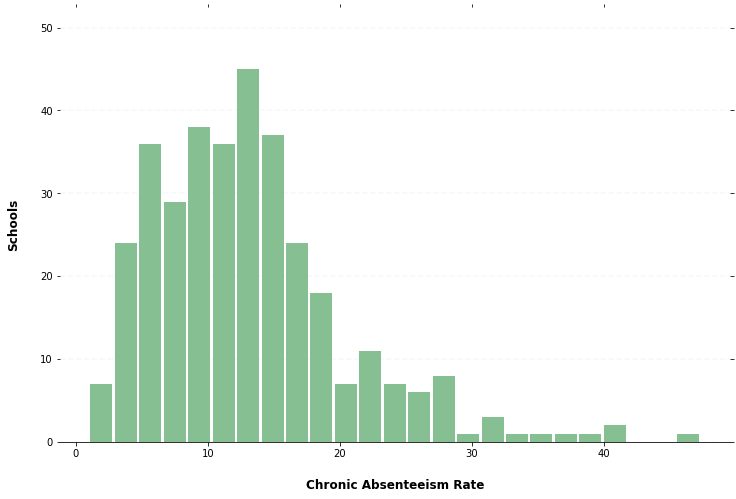

array([<AxesSubplot:xlabel='Chronic Absenteeism Rate', ylabel='Schools'>],
      dtype=object)

In [43]:
simple_hist(att, 'CHRONIC_ABSENT_PERC_ALL', 'Chronic Absenteeism Rate', 'Schools')